In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time, TimeDelta
import astropy.units as u


In [27]:
# Get today's date
today = Time.now()

# Earth location (Ventspils, Latvia)
latitude = 57.5533757301843  # Latitude of VIRAC, Latvia in degrees
longitude = 21.85481581220393  # Longitude of VIRAC, Latvia in degrees
elevation = 10  # Elevation in meters (optional)

# Create EarthLocation object with the given location
location = EarthLocation(lat=latitude, lon=longitude, height=elevation)

# Duration of a day in minutes
duration = 24 * 60

# Times for each minute of the day
times = today + np.linspace(0, 1, duration) * u.day


In [28]:
# Lists to store Sun altitudes, azimuths, and visibility
sun_altitudes = []
sun_azimuths = []
sun_visible = []

# Calculate the position of the Sun for each minute
for time in times:
    # Calculate the position of the Sun in altazimuthal coordinates
    sun_altaz = get_sun(time).transform_to(
        AltAz(obstime=time, location=location))

    # Check if the Sun is above the horizon
    if sun_altaz.alt.deg > 0:
        sun_visible.append(True)
    else:
        sun_visible.append(False)

    # Store the altitude and azimuth of the Sun
    sun_altitudes.append(sun_altaz.alt.deg)
    sun_azimuths.append(sun_altaz.az.deg)


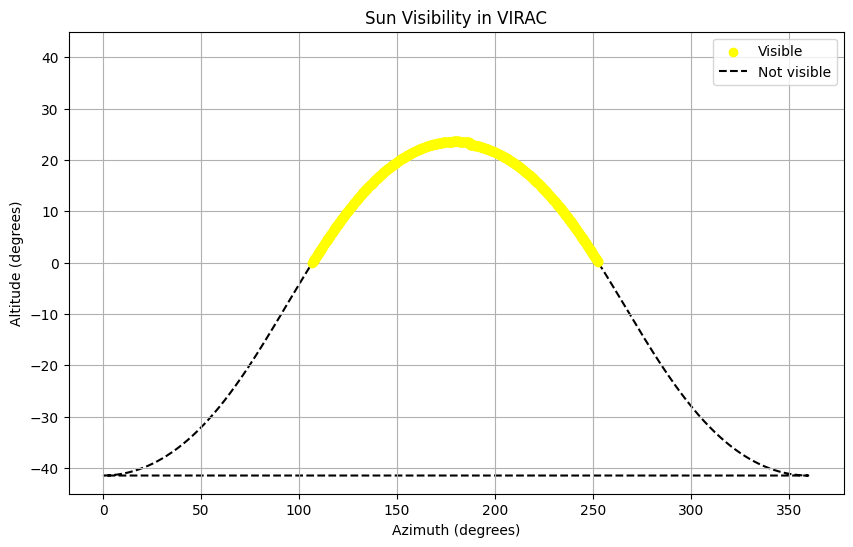

In [32]:
# Convert lists to numpy arrays
sun_altitudes = np.array(sun_altitudes)
sun_azimuths = np.array(sun_azimuths)
sun_visible = np.array(sun_visible)

# Plot the positions of the Sun in altazimuthal coordinates
plt.figure(figsize=(10, 6))

# Plot when the Sun is visible
plt.scatter(sun_azimuths[sun_visible], sun_altitudes[sun_visible],
            color='yellow', label='Visible', zorder=2)

# Plot when the Sun is not visible with a black dashed line
plt.plot(sun_azimuths[~sun_visible], sun_altitudes[~sun_visible],
         'k--', label='Not visible', zorder=1)

plt.xlabel('Azimuth (degrees)')
plt.ylabel('Altitude (degrees)')
plt.title('Sun Visibility in VIRAC')
plt.legend()
plt.grid(True)
plt.ylim(-45, 45)  # Limit the y-axis from 0 to 90 degrees
plt.show()
